In [21]:
import pandas as pd
import json

# Folium 라이브러리
# - 지도 위에 데이터 시각화
# - 웹기반 지도 출력
# - 라이브러리 설치 : pip install folium

# 라이브러리 불러오기
import folium

# 1. 지도 만들기
# - Map()함수 사용, zoom 및 scroll 가능
# - location=[위도,경도]
# - zoom_start : 1(축소)~15(확대)
서울지도 = folium.Map(location=[37.55,126.98], zoom_start=12)




In [22]:
 서울지도.save('./서울.html')

In [23]:
# extension->open in webbrowser 검색 후 설치
# alt + b로 실행

In [24]:
 # 2. 지도 스타일 적용
# - tiles : 타일의 종류, Stamen Terrain(산악지형 강조), Stamen Toner(흑백 도로망 강조), Stamen Watercolor(수채화 형식 표현)
# - http://maps.stamen.com 참조
서울지도2 = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain',zoom_start=12)
서울지도3 = folium.Map(location=[37.55,126.98], tiles='Stamen Toner', zoom_start=15)
서울지도4 = folium.Map(location=[37.55,126.98], tiles='Stamen Watercolor', zoom_start=10)
서울지도2.save('./seoul2.html')
서울지도3.save('./seoul3.html')
서울지도4.save('./seoul4.html')

In [25]:
# 지도 출력해보기
# Jupyter Notebook에서는 바로 출력 가능
# 일반적으로 save() 메소드로 html 형식으로 저장 후 활용
서울지도2

In [26]:
 # 3. 지도에 마커 표시하기(일반적인 마커 이미지 사용)
df = pd.read_excel('./sample/서울지역 대학교 위치.xlsx')
대학교 = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain',zoom_start=12)
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.Marker([lat, lng], popup= name).add_to(대학교)
대학교.save('./서울지역 대학교 위치.html')

In [27]:
# 마커 표시된 지도 출력
대학교

In [28]:
# 지도에 원형 마커 표시해보기
df = pd.read_excel('./sample/서울지역 대학교 위치.xlsx')
대학교 = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain',zoom_start=12)
for name, lat, lng in zip(df.index, df.위도, df.경도):
 folium.CircleMarker([lat, lng],
 radius = 10,
 color='brown',
 fill=True,
 fil_color='coral',
 fill_opacity=0.7,
 popup=name
 ).add_to(대학교)
대학교.save('./서울지역 대학교 위치_원형마커.html')

In [29]:
# 원형마커 지도 출력해보기
대학교

In [30]:
# 마커 누르면 대학교 이름 나오게 해보기
# 한글문제 처리
df = pd.read_excel('./sample/서울지역 대학교 위치.xlsx')
대학교 = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain',zoom_start=12)
tooltip = 'Click me!'
for name, lat, lng in zip(df.name, df.위도, df.경도):
 folium.CircleMarker([lat, lng],
 radius = 10,
 color='brown',
 fill=True,
 fil_color='coral',
 fill_opacity=0.7,
 popup=name,
 tooltip = tooltip
 ).add_to(대학교)
대학교.save('./서울지역 대학교 위치_원형마커.html')


In [31]:
대학교

In [32]:
# 
# GeoJSON(지오제이슨) : 
# - 위치정보를 갖는 점을 기반으로 체계적으로 지형을 표현하기 위해 설계된 개방형 공개 표준 형식
# - JSON인 자바스그립트 오브젝트 노테이션(Object Notation)을 사용
# - [경도, 위도] 표기법 사용, cf.구글맵이나 오픈스트리트맵서비스는 [위도,경도] 표기법 사용
# https://ko.wikipedia.org/wiki/GeoJSON 참조
#

In [33]:
# 5. 지도영역에 단계구분도(Choropleth - Map)
file_path = './sample/경기도인구데이터.xlsx'
df = pd.read_excel(file_path, index_col='구분')
df.columns = df.columns.map(str)
# 경기도 시군구 경계 정보를 가진 geo-json 파일 불러오기
geo_path = './sample/경기도행정구역경계.json'
try:
    geo_data = json.load(open(geo_path, encoding='utf-8'))
except:
    geo_data = json.load(open(geo_path, encoding='utf-8-sig'))
# 경기도 지도 만들기
g_map = folium.Map(location=[37.5502,126.982],tiles='Stamen Terrain', zoom_start=9)
# 출력할 연도 선택 (2007 ~ 2017년 중에서 선택)
# 직접 입력 받도록 변경 해보기
year = '2007' 
# Choropleth(일종의 주제별 thematic) 클래스로 단계구분도 표시하기
folium.Choropleth(geo_data=geo_data, # 지도 경계
 data = df[year], # 표시하려는 데이터
 columns = [df.index, df[year]], # 열 지정
 fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
 threshold_scale=[10000, 100000, 300000, 500000, 700000], 
 key_on='feature.properties.name',).add_to(g_map)
# 지도를 HTML 파일로 저장하기
g_map.save('./gyonggi_population_' + year + '.html')

In [34]:
# 경기 지도 출력해 보기
g_map


# 레이다 차트(Radar Chart) 그리기
>
Spider Plot 이라고도 함
어떤 측정 목표(예제에서는 카테고리)에 대한 평가항목(예제에서는 그룹)이 여러 개일 때 사용
: 비교평가를 시각적으로 볼 수 있도록 함
항목 수에 따라 원을 같은 간격으로 나누고, 중심으로부터 일정 간격으로 동심으로 척도를 재
는 칸을 나누어 표시
각 평가항목의 정량화된 점수에 따라 그 위치에 점을 찍고 평가항목간 점을 이어 선으로 만들
어 항목 간 균형을 한눈에 볼 수 있도록 해줌
여러 측정 목표를 함께 겹쳐 놓아 비교하기에도 편리함
각 항목 간 비율뿐만 아니라 균형과 경향을 직관적으로 알 수 있음

In [35]:
 # 라이브러리 설정
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
# 한글폰트
from matplotlib import font_manager, rc
font_path = "./sample/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [36]:
 # 데이터 프레임 준비
df = pd.DataFrame({
'group': ['전사','궁수','법사','도둑'],
'체력': [38, 1.5, 30, 4],
'지능': [29, 10, 9, 34],
'민첩': [8, 39, 23, 24],
'피': [7, 31, 33, 14],
'마나': [28, 15, 32, 14]
})
df

,group,체력,지능,민첩,피,마나
0,전사,38.0,29,8,7,28
1,궁수,1.5,10,39,31,15
2,법사,30.0,9,23,33,32
3,도둑,4.0,34,24,14,14


In [37]:
# 척도 카테고리 추출
categories=list(df)[1:]
# 변수 개수 설정 : N
N = len(categories)
# 확인
print(categories)
print(N)

['체력', '지능', '민첩', '피', '마나']
5


In [38]:
# 데이터 프레임의 첫번째 라인만 그려보기
values=df.loc[0].drop('group').values.flatten().tolist() #그룹을 삭제->다차원 배열->1차원배열->리스트
print(values)
# 닫힌 형태로 만들기 위해 처음 값을 부가적으로 추가
values += values[:1]
print(values)

[38.0, 29, 8, 7, 28]
[38.0, 29, 8, 7, 28, 38.0]


In [39]:
# N개 척도(카테고리)에 대해 원을 균등 분할 : plot수 / N
angles = [n / float(N) * 2 * pi for n in range(N)]
print(angles)
# 닫힌 형태로 만듬
angles += angles[:1]
print(angles)

[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669]
[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0]


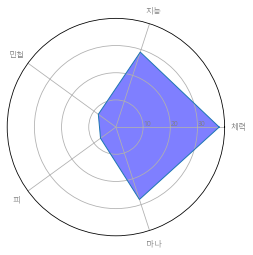

In [40]:
# spider plot 초기화
ax = plt.subplot(111, polar=True)
# 변수당 축을 그리고 라벨(카테고리 이름) 부여 : x축에 해당하는 ...
plt.xticks(angles[:-1], categories, color='grey', size=8)
# ylabel들을 그림 : y축에 해당하는...
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
# 데이터를 그리고(선)
ax.plot(angles, values, linewidth=1, linestyle='solid')
# 다각형으로 표현된 내부를 채움
ax.fill(angles, values, 'b', alpha=0.5)
# 그림 그리기
plt.show()

# 여러 대상을 한 Radar chart로 표현

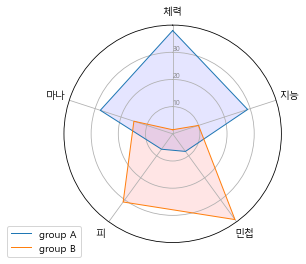

In [41]:
# N개의 각 축에 대한 척도(카테고리)에 대해 원을 균등 분할 : plot수 / N
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
# 초기화
ax = plt.subplot(111, polar=True)
# 첫 축을 맨 위로 놓기
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
# x축 그리고 라벨 설정
plt.xticks(angles[:-1], categories)
# y축 라벨 설정
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
# ------- PART 2: Add plots
# 각 카테고리 데이터에 대한 선 그리기
# 일반적으로 3개 이상 그리면 차트를 읽기 힘들어지므로 2개만 그려봄, 두 개를 하나의 차트에서 비교하기 위함
# A 그룹에 대한 그림
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
# B 그룹에 대한 그림
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)
# 범례 추가
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
# 그림 그리기
plt.show()

# facet을 사용한 Radar chart

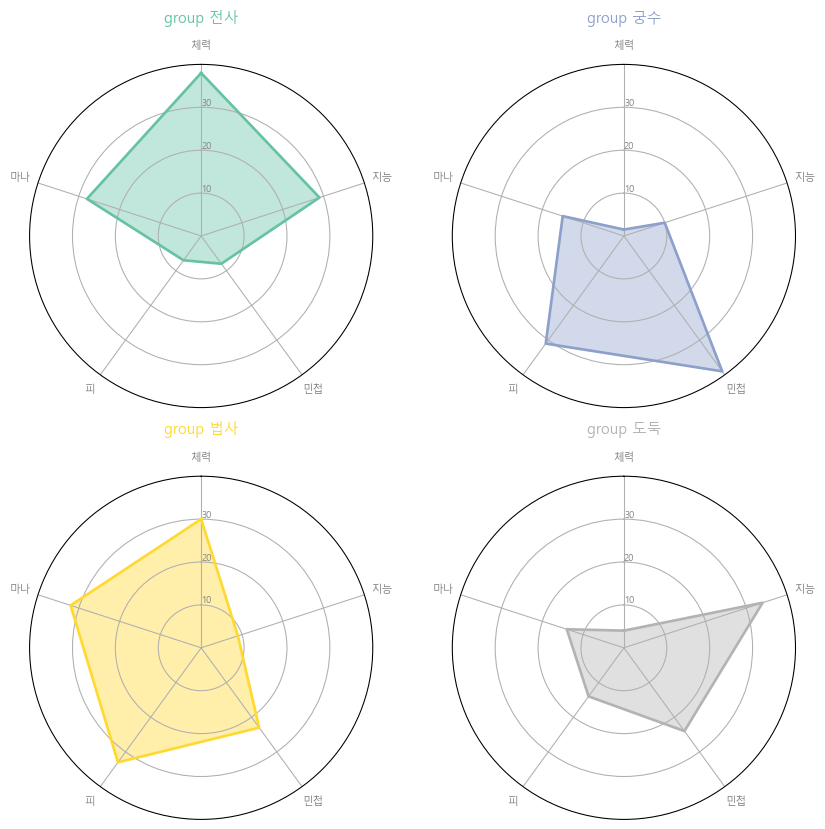

In [42]:
# ------- PART 1: 하나의 데이터 셋에 대한 선을 그려주는 함수 정의
def make_spider( row, title, color):
 # 척도 카테고리 추출하고 변수 개수 N 설정
 categories=list(df)[1:]
 N = len(categories)
 
 # N개의 각 축에 대한 척도(카테고리)에 대해 원을 균등 분할 : plot수 / N
 angles = [n / float(N) * 2 * pi for n in range(N)]
 angles += angles[:1]
 # 서브 플롯 위치 잡기 : 2*2의 서브 플롯에서 row+1의 위치를 선택
 ax = plt.subplot(2,2,row+1, polar=True, )
 
 # 첫 축을 맨 위로 설정
 ax.set_theta_offset(pi / 2)
 ax.set_theta_direction(-1)
 
 # x축에 대해 변수(카테고리)당 하나의 선과 라벨 부여
 plt.xticks(angles[:-1], categories, color='grey', size=8)
 
 # y축 라벨 부여
 ax.set_rlabel_position(0)
 plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
 plt.ylim(0,40)
 
 # 데이터에 대해 플롯 생성
 values=df.loc[row].drop('group').values.flatten().tolist()
 values += values[:1]
 ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
 ax.fill(angles, values, color=color, alpha=0.4)
 
 # 타이틀 추가
 plt.title(title, size=11, color=color, y=1.1)
# ------- PART 2: 각 facet에 대해 적용
# 그림판 초기화
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
# 각 sub plot에 적용할 컬러 팔레트 생성
my_palette = plt.cm.get_cmap("Set2", len(df.index))
# 반복해서 전체에 대한 각 facet의 sub plot 그리기
for row in range(0, len(df.index)):
 make_spider( row=row, title='group '+df['group'][row], color=my_palette(row))




# plotly : 데이터 시각화 라이브러리
- 미려한 출력 제공
- 인터렉티브한 시각화가 가능
설치
pip install plotly

In [43]:
# 라이브러리 가져오기
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# 산점도(Scatter plot)

In [44]:
# x와 y는 표현하려는 대상에 대한 자료값 배열 처럼 사용
fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
fig.show()

In [45]:
# x와 y는 DataFrame의 columns처럼 사용
df = px.data.iris() # iris is a pandas DataFrame
fig = px.scatter(df, x="sepal_width", y="sepal_length")
fig.show()

In [46]:
# 크기와 색상으로 범례 표시
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
 size='petal_length', hover_data=['petal_width'])
fig.show()

# 선 그래프(Line plot)

In [47]:
t = np.linspace(0, 2*np.pi, 100)
fig = px.line(x=t, y=np.cos(t), labels={'x':'t', 'y':'cos(t)'})
fig.show()

In [48]:
df = px.data.gapminder().query("continent == 'Oceania'")
fig = px.line(df, x='year', y='lifeExp', color='country')
fig.show()

# 점선 그래프(Scatter & Line)


In [49]:
# 단순 점선 그래프
N = 1000
t = np.linspace(0, 10, 100)
y = np.sin(t)
fig = go.Figure(data=go.Scatter(x=t, y=y, mode='markers'))
fig.show()

In [50]:
# 선과 점 표현 그래프
np.random.seed(1)
N = 100
random_x = np.linspace(0, 1, N)
random_y0 = np.random.randn(N) + 5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N) - 5
fig = go.Figure()
# Add traces
fig.add_trace(go.Scatter(x=random_x, y=random_y0,
 mode='markers',
name='markers'))
fig.add_trace(go.Scatter(x=random_x, y=random_y1,
 mode='lines+markers',
name='lines+markers'))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
 mode='lines',
 name='lines'))
fig.show()

In [51]:
# 버블 산점 그래프
fig = go.Figure(data=go.Scatter(
 x=[1, 2, 3, 4],
 y=[10, 11, 12, 13],
 mode='markers',
 marker=dict(size=[40, 60, 80, 100],
 color=[0, 1, 2, 3])
))
fig.show()

In [52]:
# 스타일 산점 그래프
t = np.linspace(0, 10, 100) # numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
fig = go.Figure()
fig.add_trace(go.Scatter(
 x=t, y=np.sin(t),
 name='sin',
 mode='markers',
 marker_color='rgba(152, 0, 0, .8)'
))
fig.add_trace(go.Scatter(
 x=t, y=np.cos(t),name='cos',
 marker_color='rgba(255, 182, 193, .9)'
))
# Set options common to all traces with fig.update_traces
fig.update_traces(mode='markers', marker_line_width=2, marker_size=10)
fig.update_layout(title='Styled Scatter',
 yaxis_zeroline=False, xaxis_zeroline=False)
fig.show()


In [53]:
# 호버(hover) 데이터 라벨
data= pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/2014_usa_states.csv")
fig = go.Figure(data=go.Scatter(x=data['Postal'],
 y=data['Population'],
 mode='markers',
marker_color=data['Population'],
 text=data['State'])) # hover text goes here
fig.update_layout(title='Population of USA States')
fig.show()


# Plotly의 3D chart 알아보기
- plotly 라이브러리를 활용해 다양한 형태의 3D 차트를 만드는
방법에 대해 학습
1. 3D Axes
- 3D figures는 layout 객체에 scene 이라는 속성(attribute)을
가짐
: scene은 xaxis, yxaxis, zxaxis 파라메터 속성들을 포함

In [54]:
import plotly.graph_objects as go
import numpy as np
np.random.seed(1)
N = 70
fig = go.Figure(data=[go.Mesh3d(x=(70*np.random.randn(N)),
 y=(55*np.random.randn(N)),
 z=(40*np.random.randn(N)),
 opacity=0.1,
 color='rgba(244,22,100,0.6)'
 )])
fig.update_layout(
 scene = dict(
 xaxis = dict(nticks=4, range=[-100,100],), # 축 눈금과 축 범위 설정
 yaxis = dict(nticks=4, range=[-50,100],),
 zaxis = dict(nticks=4, range=[-100,100],),),
 width=700,
 margin=dict(r=20, l=10, b=10, t=10))
fig.show()

# 고정비율 축(Fixed Ratio Axes)
    aspectmode = "auto" | "cube" | "data" | "manual" 4가지 중 하나
    auto : 한 축이 다른 축보다 4배 이상 차이나지 않는 한 data 기준으로 자동설정
    cube : 사각형
    data : 축의 범위에 따라 다름
    manual : 입력된 비율로 고정


In [55]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
N = 50
fig = make_subplots(rows=2, cols=2,
 specs=[[{'is_3d': True}, {'is_3d': True}],
 [{'is_3d': True}, {'is_3d': True}]],
 print_grid=False)
for i in [1,2]:
 for j in [1,2]:
    fig.append_trace(
 go.Mesh3d(
 x=(60*np.random.randn(N)),
 y=(25*np.random.randn(N)),
 z=(40*np.random.randn(N)),
 opacity=0.5,
 ),
 row=i, col=j)
fig.update_layout(width=700, margin=dict(r=10, l=10, b=10, t=10))
# 좌상단 subplot을 cube로
fig.update_layout(scene_aspectmode='cube')
# 직접 z-axis를 다른 축들의 2배로 늘림
fig.update_layout(scene2_aspectmode='manual',
 scene2_aspectratio=dict(x=1, y=1, z=2))
# 축 범위에 맞도록 조정
fig.update_layout(scene3_aspectmode='data')
# data에 기반해서 자동으로 균형잡히도록 조정
fig.update_layout(scene4_aspectmode='auto')
fig.show()

# 축 타이틀(title) 설정하기

In [56]:
import plotly.graph_objects as go
import numpy as np
# Define random surface
N = 50
fig = go.Figure()
fig.add_trace(go.Mesh3d(x=(60*np.random.randn(N)),
 y=(25*np.random.randn(N)),
 z=(40*np.random.randn(N)),
 opacity=0.5,
 color='yellow'
 ))
fig.add_trace(go.Mesh3d(x=(70*np.random.randn(N)),
 y=(55*np.random.randn(N)),
 z=(30*np.random.randn(N)),
 opacity=0.5,
 color='pink'
 ))
fig.update_layout(scene = dict(
 xaxis_title='X AXIS TITLE',
 yaxis_title='Y AXIS TITLE',
zaxis_title='Z AXIS TITLE'),
width=700,
margin=dict(r=20, b=10, l=10, t=10))
fig.show()


# 그래프 눈금 (Tick) 관련 설정
- ntikcs : 해당 축의 최대 눈금수
- tick0 : 해당 축의 첫번째 눈금 위치
- ticks : 축선 바깥("outside") , 안쪽( "inside") 또는 그리지 않음("")
- tickfont : 눈금 관련 표시 글자들에 대한 폰트설정
- ticksuffix : 눈금 라벨 suffix
- ticktext : 리스트, 넘파이 배열, 판다스 시리즈(숫자, 문자열, 날짜) 지정, tickvals와 연계
- tickvals : 해당 축 눈금에 값 표시, 리스트, 넘파이 배열, 판다스 시리즈(숫자, 문자열, 날짜)
지정 가능
- tickwith : 픽셀단위로 눈금 두께

In [58]:
import plotly.graph_objects as go
import numpy as np
# Define random surface
N = 50
fig = go.Figure(data=[go.Mesh3d(x=(60*np.random.randn(N)),
 y=(25*np.random.randn(N)),
 z=(40*np.random.randn(N)),
 opacity=0.5,
 color='rgba(100,22,200,0.5)'
 )])
# Different types of customized ticks
fig.update_layout(scene = dict(
 xaxis = dict(
 ticktext= ['TICKS','MESH','PLOTLY','PYTHON'],
 tickvals= [0,50,75,-50]),
 yaxis = dict(
 nticks=5, tickfont=dict(
 color='green',
 size=12,
family='Old Standard TT, serif',),
 ticksuffix='#'),
 zaxis = dict(
 nticks=4, ticks='outside',
 tick0=0, tickwidth=4),),
 width=700,
margin=dict(r=10, l=10, b=10, t=10)
)
fig.show()


# 배경과 그리드 색상

In [59]:
import plotly.graph_objects as go
import numpy as np
N = 50
fig = go.Figure(data=[go.Mesh3d(x=(30*np.random.randn(N)),
 y=(25*np.random.randn(N)),
 z=(30*np.random.randn(N)),
 opacity=0.5,)])
# xaxis.backgroundcolor is used to set background color
fig.update_layout(scene = dict(
 xaxis = dict(
 backgroundcolor="rgb(200, 200, 230)",
 gridcolor="white",
showbackground=True,
 zerolinecolor="white",),
 yaxis = dict(
 backgroundcolor="rgb(230, 200,230)",
 gridcolor="white",
showbackground=True,
 zerolinecolor="white"),
 zaxis = dict(
 backgroundcolor="rgb(230, 230,200)",
 gridcolor="white",
showbackground=True,
 zerolinecolor="white",),),
 width=700,
margin=dict(r=10, l=10, b=10, t=10)
 )
fig.show()

# 2. 3차원 산점도(3D Scatter Plots) 그리기

In [61]:
import plotly.express as px
df = px.data.iris()
print(df)
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width', color='species')
fig.show()

     sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     species_id  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
145      